In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
cric_data=pd.read_csv(r"C:\Users\adith\Downloads\batting_stats_for_icc_mens_t20_world_cup_2024.csv")

In [3]:
cric_data.head()

,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,NP Kenjige,United States of America,4,2,0,1,1,0.5,25.00,0,0,1
1,Aaron Jones,United States of America,6,6,2,162,94*,40.5,135.00,0,1,1
2,Aasif Sheikh,Nepal,3,3,0,63,42,21.0,88.73,0,0,0
3,Abbas Afridi,Pakistan,1,1,0,17,17,17.0,80.95,0,0,0
4,F Achelam,Uganda,1,1,0,9,9,9.0,69.23,0,0,0


In [4]:
cric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  247 non-null    object 
 1   Team    247 non-null    object 
 2   Mat     247 non-null    int64  
 3   Inns    247 non-null    int64  
 4   NO      247 non-null    int64  
 5   Runs    247 non-null    int64  
 6   HS      247 non-null    object 
 7   Ave     247 non-null    float64
 8   SR      247 non-null    float64
 9   100     247 non-null    int64  
 10  50      247 non-null    int64  
 11  0       247 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 23.3+ KB


In [5]:
cric_data.shape

(247, 12)

In [6]:
cric_data.isnull().sum()

Player    0
Team      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
SR        0
100       0
50        0
0         0
dtype: int64

In [7]:
cric_data['HS'].value_counts()

0      15
2       9
10      8
17      6
9       6
       ..
70      1
45*     1
51      1
30      1
22      1
Name: HS, Length: 101, dtype: int64

*droping irrelevant feature like 100 50 and 0 as it does not make any impact in the data set

*droping the categorical column player and team

*as HS is in object we want to convert to numeric

In [8]:
#conerting HS to numeric 
cric_data['HS']=cric_data['HS'].str.replace('*','').astype('int')

In [9]:
cric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  247 non-null    object 
 1   Team    247 non-null    object 
 2   Mat     247 non-null    int64  
 3   Inns    247 non-null    int64  
 4   NO      247 non-null    int64  
 5   Runs    247 non-null    int64  
 6   HS      247 non-null    int32  
 7   Ave     247 non-null    float64
 8   SR      247 non-null    float64
 9   100     247 non-null    int64  
 10  50      247 non-null    int64  
 11  0       247 non-null    int64  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 22.3+ KB


In [10]:
#droping irrlevant features 
cric_data.drop(columns=['Player','Team','100','50','0'],axis=1,inplace=True)

In [11]:
cric_data.head()

,Mat,Inns,NO,Runs,HS,Ave,SR
0,4,2,0,1,1,0.5,25.00
1,6,6,2,162,94,40.5,135.00
2,3,3,0,63,42,21.0,88.73
3,1,1,0,17,17,17.0,80.95
4,1,1,0,9,9,9.0,69.23


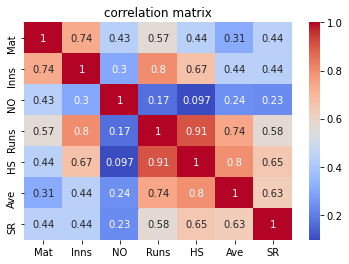

In [12]:
sns.heatmap(cric_data.corr(),annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

By visualizing the above matrix,find that the Highest Score(HS) is highly correlated with Runs and Ave So need to drop 'HS' for further analysis 

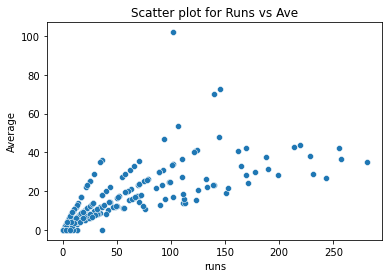

In [13]:
sns.scatterplot(x='Runs',y='Ave',data=cric_data)
plt.title('Scatter plot for Runs vs Ave')
plt.xlabel('runs')
plt.ylabel('Average')
plt.show()

In [14]:
#dropping HS 
cric_data.drop(columns=['HS'],axis=1,inplace=True)

In [15]:
#define dependent(y) and independent (X) variables
X=cric_data.drop(columns=['Ave'],axis=1)  #independent variable
y=cric_data['Ave']  #average as dependent variable

In [16]:
#splitting training data and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
print(X.shape,X_train.shape,X_test.shape)

(247, 5) (197, 5) (50, 5)


In [18]:
from sklearn.linear_model import LinearRegression

Building the linear regression model

In [19]:
model=LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(X_test)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error

In [23]:
y_pred[:10]

array([ 8.80040868,  4.65225919,  7.3681774 ,  7.06391548, 26.34338373,
        9.24349525, 23.51010596, 19.84494119, 52.30850739, 11.23029817])

In [24]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print(f"mean squared erroe:{mse:.2f}")
print(f" r2 score:{r2:.2f}")

mean squared erroe:51.82
 r2 score:0.72


In [25]:
#testing the model with sample data
model.predict([['1','1','0','9','69.23']])

array([11.23029817])

In [26]:
cric_data.head()

,Mat,Inns,NO,Runs,Ave,SR
0,4,2,0,1,0.5,25.00
1,6,6,2,162,40.5,135.00
2,3,3,0,63,21.0,88.73
3,1,1,0,17,17.0,80.95
4,1,1,0,9,9.0,69.23


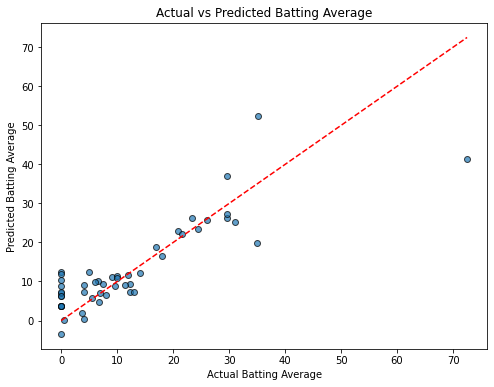

In [27]:
#  Actual vs Predicted
# visualizing best fit line for the test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor="k", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Batting Average")
plt.ylabel("Predicted Batting Average")
plt.title("Actual vs Predicted Batting Average")
plt.show()

Building stats model


In [28]:
import statsmodels.api as sm

In [29]:
X_train_sm=sm.add_constant(X_train)

lr=sm.OLS(y_train,X_train_sm).fit()

In [30]:
lr.params

const    7.539980
Mat     -1.036019
Inns    -2.693208
NO       3.558657
Runs     0.231379
SR       0.077093
dtype: float64

In [31]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    Ave   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     88.78
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           6.39e-48
Time:                        20:13:50   Log-Likelihood:                -684.48
No. Observations:                 197   AIC:                             1381.
Df Residuals:                     191   BIC:                             1401.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5400      1.753      4.301      0.0

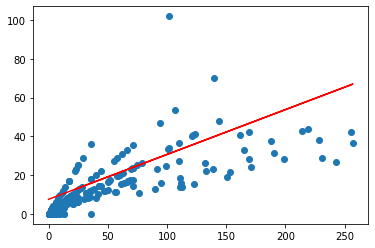

In [32]:
plt.scatter(X_train['Runs'],y_train)
plt.plot(X_train['Runs'],7.5400+0.2314*X_train['Runs'],'r')
plt.show()

In [33]:
y_train_pred=lr.predict(X_train_sm)

In [34]:
y_train[:10]

170     0.00
159     4.66
181     2.00
147     7.33
150     5.25
116    23.16
93      2.00
28      8.00
16     23.66
236     6.33
Name: Ave, dtype: float64

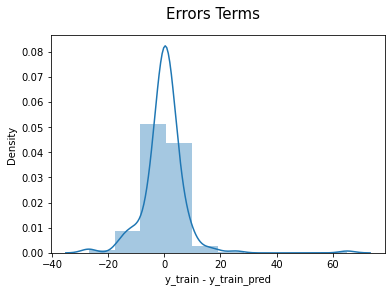

In [35]:
residuals = (y_train - y_train_pred)
# Plot the residuals
# Normality of errors or residuals
fig = plt.figure()
sns.distplot(residuals, bins = 10)
fig.suptitle("Errors Terms", fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 10)
plt.show()
# Below graph shows that residuals are normally distributed.

In [37]:
X_test_sm=sm.add_constant(X_test)# stats model for testing data
y_pred=lr.predict(X_test_sm)

In [38]:
r2_score(y_test,y_pred)

0.7204927725665935

Inferences:

1. Target Variables:
Variables like Ave (Batting Average) and SR (Strike Rate) are continuous and real-valued, making them appropriate for regression tasks.

2. Feature Selection:
Features such as Mat (Matches), NO (Not Outs), HS (Highest Score), and Runs are numerical and provide predictive power for modeling target variables.
Irrelevant features, including '100', '50', and '0', were dropped as they are not directly related to predicting the target variable.

3. Handling Correlated Features:
HS (Highest Score) was dropped because it is highly correlated with Runs and Ave, which could introduce multicollinearity and reduce model interpretability.

4. Categorical Data:
Categorical features, such as player names and teams, were removed as they are non-numeric and irrelevant for predicting batting performance.


Conclusion:

1. Model Robustness:
Based on the linear regression model, statistical analysis, and visualizations, we are confident in the model’s ability to explain and predict the target variable effectively.

2. Prediction Power:
The model demonstrates decent predictive power, as reflected by metrics such as R² and Mean Squared Error (MSE), which indicate good alignment between predicted and actual values.

3. Residual Analysis:
The residuals follow a normal distribution, confirming that the model assumptions are satisfied and no significant biases exist in the predictions.

4. Practical Implications:
The model provides valuable insights into factors influencing batting averages and strike rates, making it a reliable tool for analysis in the given context.